<a href="https://colab.research.google.com/github/yoshikagua/MetNumUN2024I/blob/main/Lab2/staguirreg_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U fortran-magic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.1 MB/s eta 0:00:00


In [2]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [3]:
assert ran_the_first_cell, "Oh noes!"

In [4]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [5]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [6]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [7]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [8]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [9]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [10]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [11]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [12]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [13]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [14]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [15]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [16]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [17]:
# No slicing.
#philosophers['Bertrand':'Immanuel']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [18]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [19]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [20]:
%%time

matmul(a, b)

CPU times: user 48 µs, sys: 10 µs, total: 58 µs
Wall time: 66.3 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [21]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.198
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.39
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [22]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rowsOut = len(B)
    colsOut = len(A[0])
    out = [[0 for col in range(colsOut)] for row in range(rowsOut)]

    for i in range(rowsOut):
        for j in range(colsOut):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [23]:
try:
  matmul(a,b)
except:
  print("list index out of range")


**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [24]:
def matmul(A, B):
    if len(A[0]) != len(B):
        print("matrices cannot be multiplied")
        return None

    result = []
    for i in range(len(A)):
        row = []
        for j in range(len(B[0])):
            sum = 0
            for k in range(len(B)):
                sum += A[i][k] * B[k][j]
            row.append(sum)
        result.append(row)

    return result


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [25]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2],
     [2, 3],
     [3, 4]]

if len(a[0]) == len(b):
    print(matmul(a, b))
else:
    print("Matrices cannot be multiplied")


[[14, 20], [20, 29], [38, 56], [6, 9]]


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [26]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7]]

b = [[1, 2],
     [2, 3],
     [3, 4]]

if len(a[0]) == len(b):
    print(matmul(a, b))
else:
    print("Matrices cannot be multiplied")


[[14, 20], [20, 29], [38, 56]]


**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [27]:
import random

In [28]:
random.normalvariate(0,1)

-1.145420688009969

In [29]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

matrix = random_matrix(2, 3)
matrix

[[0.376291188854316, 0.5309175394440164, 0.62054414527885],
 [0.2981025004940532, 0.8746387965114122, 0.8406385989359252]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [30]:
import time

# Genera matrices de 600x100 y 100x600 aleatorias
matrixA = random_matrix(600, 100)
matrixB = random_matrix(100, 600)

# Corre 10 veces matmul y calcula el tiempo promedio
numRuns = 10
totalTime = 0
for i in range(numRuns):
    startTime = time.time()
    matmul(matrixA, matrixB)
    endTime = time.time()
    totalTime += endTime - startTime
avgTime = totalTime / numRuns
print(f"Tiempo promedio de ejecución de matmul: {avgTime:.5f} segundos")


Tiempo promedio de ejecución de matmul: 7.99324 segundos


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [31]:
data = {"python": avgTime}
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
print(df)


        Tiempo promedio
python         7.993237


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [32]:
import numpy as np

# Genera matrices de tamaño 600x100 y 100x600 aleatorias como NumPy arrays
matrixA = np.random.rand(600, 100)
matrixB = np.random.rand(100, 600)

# Corre 10 veces la multiplicación y calcula el tiempo promedio
numRuns = 10
totalTime = 0
for i in range(numRuns):
    startTime = time.time()
    np.dot(matrixA, matrixB)
    endTime = time.time()
    totalTime += endTime - startTime
avgTimeNumpy = totalTime / numRuns
data["numpy"]=avgTimeNumpy
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
df


,Tiempo promedio
python,7.993237
numpy,0.004416


In [33]:
%%time
matrixA = random_matrix(600, 100)
matrixB = random_matrix(100, 600)
x = matmul(matrixA, matrixB)

CPU times: user 7.12 s, sys: 87.8 ms, total: 7.21 s
Wall time: 7.2 s


In [34]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [35]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [36]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [37]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.7 ms, sys: 0 ns, total: 12.7 ms
Wall time: 14.1 ms


333328333350000.0

In [38]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 177 µs, sys: 0 ns, total: 177 µs
Wall time: 187 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [39]:
A = [[1, 2],
     [3, 4]]

B = [[5, 6],
     [7, 8]]


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [40]:
%%fortran
subroutine fortran_matmul(A, B, out)
  implicit none
  integer, parameter :: rowsA = 2, colsA = 2, rowsB = 2, colsB = 2
  real, intent(in) :: A(rowsA,colsA), B(rowsB,colsB)
  real, intent(out) :: out(rowsA,colsB)
  integer :: i, j, k

  do i = 1, rowsA
    do j = 1, colsB
      do k = 1, colsA
        out(i,j) = out(i,j) + A(i,k) * B(k,j)
      end do
    end do
  end do

end subroutine fortran_matmul


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [41]:
fortran_matmul(A,B)

array([[19., 22.],
       [43., 50.]], dtype=float32)

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [42]:
%%fortran
subroutine fortran_matmul2(A, B, out)
  implicit none
  integer, parameter :: rowsA = 600, colsA = 100, rowsB = 100, colsB = 600
  real, intent(in) :: A(rowsA, colsA), B(rowsB, colsB)
  real, intent(out) :: out(rowsA, colsB)
  integer :: i, j, k

  do i = 1, rowsA
    do j = 1, colsB
      do k = 1, colsA
        out(i,j) = out(i,j) + A(i,k) * B(k,j)
      end do
    end do
  end do

end subroutine fortran_matmul2



**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [43]:
MatrixA = np.array(random_matrix(600,100))
MatrixB = np.array(random_matrix(100,600))


fortran_matmul2(MatrixA,MatrixB)


array([[23.437069, 25.44031 , 26.950468, ..., 28.310322, 24.278664,
        26.933578],
       [21.668638, 24.418617, 24.840364, ..., 26.299496, 22.746447,
        26.203102],
       [22.776037, 25.799175, 27.510979, ..., 29.824722, 24.06394 ,
        28.601032],
       ...,
       [22.9171  , 24.83265 , 26.209435, ..., 24.843824, 23.767809,
        26.86074 ],
       [22.701231, 25.689905, 26.51479 , ..., 27.332066, 25.005568,
        26.963964],
       [24.08782 , 25.217567, 28.146425, ..., 28.411877, 24.714622,
        27.72923 ]], dtype=float32)

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [44]:
import time
avg_timeFM=0
for i in range(0,10):
  MA = random_matrix(600,100)
  MB = random_matrix(100,600)
  start_time=time.time()
  fortran_matmul2(MA,MB)
  e=time.time()-start_time
  avg_timeFM+=e
avg_timeFM/=10

data["fortan magic"]=avg_timeFM
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
df


,Tiempo promedio
python,7.993237
numpy,0.004416
fortan magic,0.052391


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [45]:
%%writefile matrix_multiply.f90
program matrix_multiply

    implicit none

    integer, parameter :: n = 600
    integer, parameter :: m = 100
    integer, parameter :: rep = 10

    real(8) :: matA(n, m)
    real(8) :: matB(m, n)
    real(8) :: matC(n, n)

    integer :: i, j, k, r
    real(8) :: tstart, tend, total_time

    ! Initialize matrices A and B (for simplicity, use random values)
    call random_seed()
    do i = 1, n
        do j = 1, m
            call random_number(matA(i, j))
        end do
    end do
    do i = 1, m
        do j = 1, n
            call random_number(matB(i, j))
        end do
    end do

    total_time = 0.0
    do r = 1, rep
        call cpu_time(tstart)
        do i = 1, n
            do j = 1, n
                matC(i, j) = 0.0
                do k = 1, m
                    matC(i, j) = matC(i, j) + matA(i, k) * matB(k, j)
                end do
            end do
        end do
        call cpu_time(tend)
        total_time = total_time + (tend - tstart)
        write(*, '(A, I0, A, F12.6)') "Execution ", r, " -> ", tend - tstart, " seconds"
    end do

    write(*, '(A, F12.6)') "Average Fortran execution time: ", total_time / rep, " seconds"

end program matrix_multiply


Writing matrix_multiply.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [46]:
!gfortran -o matrix_multiply matrix_multiply.f90
!./matrix_multiply

Execution 1 ->     0.257782
 seconds
Execution 2 ->     0.251745
 seconds
Execution 3 ->     0.247129
 seconds
Execution 4 ->     0.249913
 seconds
Execution 5 ->     0.262252
 seconds
Execution 6 ->     0.246178
 seconds
Execution 7 ->     0.255030
 seconds
Execution 8 ->     0.250157
 seconds
Execution 9 ->     0.285467
 seconds
Execution 10 ->     0.458512
 seconds
Average Fortran execution time:     0.276416
 seconds


In [47]:
avg_time_fo = 0.0253606

**My own example 18 - Adding Fortran average execution time to the data frame**

In [48]:
data["fortan"]=avg_time_fo
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
df

,Tiempo promedio
python,7.993237
numpy,0.004416
fortan magic,0.052391
fortan,0.025361


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [49]:
%%writefile matmulC.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define ROWS_A 600
#define COLS_A 100
#define ROWS_B 100
#define COLS_B 600

int main() {
    int i, j, k, sum;
    int **A, **B, **C;
    clock_t start, end;
    double avg = 0;

    // Asignar memoria para las matrices A, B y C
    A = (int **)malloc(ROWS_A * sizeof(int *));
    B = (int **)malloc(ROWS_B * sizeof(int *));
    C = (int **)malloc(ROWS_A * sizeof(int *));
    for (i = 0; i < ROWS_A; i++) {
        A[i] = (int *)malloc(COLS_A * sizeof(int));
        C[i] = (int *)malloc(COLS_B * sizeof(int));
    }
    for (i = 0; i < ROWS_B; i++) {
        B[i] = (int *)malloc(COLS_B * sizeof(int));
    }

    // Inicializar las matrices A y B
    for (i = 0; i < ROWS_A; i++) {
        for (j = 0; j < COLS_A; j++) {
            A[i][j] = i + j;
        }
    }
    for (i = 0; i < ROWS_B; i++) {
        for (j = 0; j < COLS_B; j++) {
            B[i][j] = i - j;
        }
    }

    // Multiplicar las matrices 10 veces y medir el tiempo de ejecución
    for (k = 0; k < 10; k++) {
        start = clock();

        for (i = 0; i < ROWS_A; i++) {
            for (j = 0; j < COLS_B; j++) {
                sum = 0;
                for (int x = 0; x < COLS_A; x++) {
                    sum += A[i][x] * B[x][j];
                }
                C[i][j] = sum;
            }
        }

        end = clock();
        avg += ((double) (end - start)) / CLOCKS_PER_SEC;
    }

    // Calcular el promedio de la ejecución y guardar en un archivo txt
    avg /= 10;
    FILE *fp;
    fp = fopen("promedio.txt", "w");
    fprintf(fp, "%f", avg);
    fclose(fp);

    // Liberar la memoria
    for (i = 0; i < ROWS_A; i++) {
        free(A[i]);
        free(C[i]);
    }
    for (i = 0; i < ROWS_B; i++) {
        free(B[i]);
    }
    free(A);
    free(B);
    free(C);

    return 0;
}


Writing matmulC.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [50]:
!gcc matmulC.c -o matmulC
!./matmulC

**My own example 21 - Adding c average execution time to the data frame**

In [51]:
file = open('promedio.txt','r')
avg_TimeC= float(file.readline())
data["C"]=avg_TimeC
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
df

,Tiempo promedio
python,7.993237
numpy,0.004416
fortan magic,0.052391
fortan,0.025361
C,0.193321


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [52]:
%%writefile matmul.cpp
#include <iostream>
#include <fstream>
#include <ctime>
using namespace std;

const int ROWS_A = 600;
const int COLS_A = 100;
const int ROWS_B = 100;
const int COLS_B = 600;

int main() {
    int i, j, k, sum;
    int **A, **B, **C;
    clock_t start, end;
    double avg = 0;

    // Asignar memoria para las matrices A, B y C
    A = new int*[ROWS_A];
    B = new int*[ROWS_B];
    C = new int*[ROWS_A];
    for (i = 0; i < ROWS_A; i++) {
        A[i] = new int[COLS_A];
        C[i] = new int[COLS_B];
    }
    for (i = 0; i < ROWS_B; i++) {
        B[i] = new int[COLS_B];
    }

    // Inicializar las matrices A y B
    for (i = 0; i < ROWS_A; i++) {
        for (j = 0; j < COLS_A; j++) {
            A[i][j] = i + j;
        }
    }
    for (i = 0; i < ROWS_B; i++) {
        for (j = 0; j < COLS_B; j++) {
            B[i][j] = i - j;
        }
    }

    // Multiplicar las matrices 10 veces y medir el tiempo de ejecución
    for (k = 0; k < 10; k++) {
        start = clock();

        for (i = 0; i < ROWS_A; i++) {
            for (j = 0; j < COLS_B; j++) {
                sum = 0;
                for (int x = 0; x < COLS_A; x++) {
                    sum += A[i][x] * B[x][j];
                }
                C[i][j] = sum;
            }
        }

        end = clock();
        avg += ((double) (end - start)) / CLOCKS_PER_SEC;
    }

    // Calcular el promedio de la ejecución y guardar en un archivo txt
    avg /= 10;
    ofstream myfile("promediocplusplus.txt");
    myfile <<avg;
    myfile.close();

    // Liberar la memoria
    for (i = 0; i < ROWS_A; i++) {
        delete[] A[i];
        delete[] C[i];
    }
    for (i = 0; i < ROWS_B; i++) {
        delete[] B[i];
    }
    delete[] A;
    delete[] B;
    delete[] C;

    return 0;
}


Writing matmul.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [53]:
!g++ matmul.cpp -o matmul
!./matmul

**My own example 24 - Adding C++ average execution time to the data frame**

In [54]:
file = open('promediocplusplus.txt','r')
avg_TimeCplusplus= float(file.readline())
data["C++"]=avg_TimeCplusplus
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
df

,Tiempo promedio
python,7.993237
numpy,0.004416
fortan magic,0.052391
fortan,0.025361
C,0.193321
C++,0.134661


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [55]:
%%writefile MatMul.java
import java.io.FileWriter;
import java.io.IOException;
import java.io.PrintWriter;
import java.util.Random;

public class MatMul {
    private static final int ROWS_A = 600;
    private static final int COLS_A = 100;
    private static final int ROWS_B = 100;
    private static final int COLS_B = 600;

    public static void main(String[] args) {
        int[][] A = new int[ROWS_A][COLS_A];
        int[][] B = new int[ROWS_B][COLS_B];
        int[][] C = new int[ROWS_A][COLS_B];
        long startTime, endTime, totalTime = 0;

        // Inicializar las matrices A y B
        Random rand = new Random();
        for (int i = 0; i < ROWS_A; i++) {
            for (int j = 0; j < COLS_A; j++) {
                A[i][j] = rand.nextInt(10) + 1; // valores aleatorios entre 1 y 10
            }
        }
        for (int i = 0; i < ROWS_B; i++) {
            for (int j = 0; j < COLS_B; j++) {
                B[i][j] = rand.nextInt(10) + 1; // valores aleatorios entre 1 y 10
            }
        }

        // Multiplicar las matrices 10 veces y medir el tiempo de ejecución
        for (int k = 0; k < 10; k++) {
            startTime = System.nanoTime();

            for (int i = 0; i < ROWS_A; i++) {
                for (int j = 0; j < COLS_B; j++) {
                    int sum = 0;
                    for (int x = 0; x < COLS_A; x++) {
                        sum += A[i][x] * B[x][j];
                    }
                    C[i][j] = sum;
                }
            }

            endTime = System.nanoTime();
            totalTime += (endTime - startTime);
        }

        // Calcular el promedio de la ejecución y guardar en un archivo txt
        double averageTime = (double) totalTime / (10 * 1_000_000_000);
        try {
            PrintWriter writer = new PrintWriter(new FileWriter("promediojava.txt"));
            writer.println(averageTime);
            writer.close();
        } catch (IOException e) {
            System.err.println("Error al escribir el archivo.");
        }
    }
}

Writing MatMul.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [56]:
!javac MatMul.java
!java MatMul

**My own example 27 - Adding Java average execution time to the data frame**

In [57]:
file = open('promediojava.txt','r')
avg_TimeJava= float(file.readline())
data["Java"]=avg_TimeJava
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
df

,Tiempo promedio
python,7.993237
numpy,0.004416
fortan magic,0.052391
fortan,0.025361
C,0.193321
C++,0.134661
Java,0.550884


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [58]:
%%writefile MatMul.js
const fs = require('fs');

const ROWS_A = 600;
const COLS_A = 100;
const ROWS_B = 100;
const COLS_B = 600;

const A = Array.from({length: ROWS_A}, () =>
  Array.from({length: COLS_A}, () => Math.floor(Math.random() * 10) + 1)
);

const B = Array.from({length: ROWS_B}, () =>
  Array.from({length: COLS_B}, () => Math.floor(Math.random() * 10) + 1)
);

const C = Array.from({length: ROWS_A}, () => Array.from({length: COLS_B}, () => 0));

let totalTime = 0;

for (let k = 0; k < 10; k++) {
  const startTime = process.hrtime.bigint();

  for (let i = 0; i < ROWS_A; i++) {
    for (let j = 0; j < COLS_B; j++) {
      let sum = 0;
      for (let x = 0; x < COLS_A; x++) {
        sum += A[i][x] * B[x][j];
      }
      C[i][j] = sum;
    }
  }

  const endTime = process.hrtime.bigint();
  totalTime += Number(endTime - startTime);
}

const averageTime = totalTime / (10 * 1e9);
let avg = averageTime.toString();

fs.writeFile('promediojs.txt',avg, (err) => {
  if (err) throw err;
  console.log(averageTime);
});



Writing MatMul.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [59]:
!node MatMul.js

0.183411488


**My own example 30 - Adding Javascript average execution time to the data frame**

In [60]:
file = open('promediojs.txt','r')
avg_TimeJS= float(file.readline())
data["JavaScript"]=avg_TimeJS
df = pd.DataFrame.from_dict(data, orient="index", columns=["Tiempo promedio"])
df

,Tiempo promedio
python,7.993237
numpy,0.004416
fortan magic,0.052391
fortan,0.025361
C,0.193321
C++,0.134661
Java,0.550884
JavaScript,0.183411


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [61]:
minimo = df['Tiempo promedio'].min()
minimo

0.004416179656982422

**My own example 32 - Adding the Speed factor columne to the data frame**

In [62]:
factor = (df['Tiempo promedio']/minimo)
df['factor velocidad']=factor
df

,Tiempo promedio,factor velocidad
python,7.993237,1809.989095
numpy,0.004416,1.000000
fortan magic,0.052391,11.863336
fortan,0.025361,5.742656
C,0.193321,43.775619
C++,0.134661,30.492645
Java,0.550884,124.742137
JavaScript,0.183411,41.531709


**My own example 33 - Sorting the the data frame by average execution time**

In [63]:
df = df.sort_values('Tiempo promedio')
df

,Tiempo promedio,factor velocidad
numpy,0.004416,1.000000
fortan,0.025361,5.742656
fortan magic,0.052391,11.863336
C++,0.134661,30.492645
JavaScript,0.183411,41.531709
C,0.193321,43.775619
Java,0.550884,124.742137
python,7.993237,1809.989095


## Why is the Python Version so Much Slower?

In [64]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [65]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [66]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [67]:
data + data

array([2, 4, 6, 8])

In [68]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 414 µs, sys: 6 µs, total: 420 µs
Wall time: 430 µs


333328333350000.0

In [69]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 590 µs, sys: 1.99 ms, total: 2.58 ms
Wall time: 2.53 ms


333328333350000.0

In [70]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 338 µs, sys: 5 µs, total: 343 µs
Wall time: 176 µs


333328333350000.0

In [71]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!

***my own example 34***

# Datos de estudiantes admitidos en Unillanos desde 2021 hasta el primer semestre de 2024.

Total datos 7.956

Datos tomados de: https://www.datos.gov.co/Educaci-n/Admitidos-Estudiantes-Unillanos/frsa-ad27/about_data

In [72]:
import pandas as pd
admitidos = pd.read_csv("Admitidos_Estudiantes_Unillanos.csv")
#admitidos
df=pd.DataFrame(admitidos)
df

,ANIO,PERIODO,TIPO_HECHO,GENERO,ESTADO_CIVIL,FECHA_NACIMIENTO,PAIS,CIUDAD_NACIMIENTO,CIUDAD_RECIDENCIA,DEPARTEMENTO_COLEGIO,MUNICIPIO_COLEGIO,COLEGIO,NATURALEZA_COLEGIO,SNIES,PROGRAMA,FACULTAD,MODALIDAD,METODOLOGIA,SEDE
0,2021,1.0,ADMITIDOS,MASCULINO,SOLTERO,09/13/2002 12:00:00 AM,COLOMBIA,VILLAVICENCIO,VILLAVICENCIO,META,VILLAVICENCIO,INEM LUIS LOPEZ DE MESA,OFICIAL,13049.0,ADMINISTRACION DE EMPRESAS,CIENCIAS ECONÓMICAS,PREGRADO,PRESENCIAL DIURNO,Villavicencio - SAN ANTONIO / Granada - BOQUEM...
1,2021,1.0,ADMITIDOS,MASCULINO,SOLTERO,04/29/2002 12:00:00 AM,COLOMBIA,ACACÍAS,ACACÍAS,META,ACACÍAS,IE JUAN ROZO,OFICIAL,13049.0,ADMINISTRACION DE EMPRESAS,CIENCIAS ECONÓMICAS,PREGRADO,PRESENCIAL DIURNO,Villavicencio - SAN ANTONIO / Granada - BOQUEM...
2,2021,1.0,ADMITIDOS,MASCULINO,SOLTERO,09/10/2004 12:00:00 AM,COLOMBIA,VILLAVICENCIO,ACACÍAS,META,ACACÍAS,IE JUAN ROZO,OFICIAL,13049.0,ADMINISTRACION DE EMPRESAS,CIENCIAS ECONÓMICAS,PREGRADO,PRESENCIAL DIURNO,Villavicencio - SAN ANTONIO / Granada - BOQUEM...
3,2021,1.0,ADMITIDOS,MASCULINO,UNION LIBRE,01/21/1996 12:00:00 AM,COLOMBIA,CHARALÁ,VILLAVICENCIO,META,VILLAVICENCIO,POLITECNICO AGROINDUSTRIAL,OFICIAL,13049.0,ADMINISTRACION DE EMPRESAS,CIENCIAS ECONÓMICAS,PREGRADO,PRESENCIAL DIURNO,Villavicencio - SAN ANTONIO / Granada - BOQUEM...
4,2021,1.0,ADMITIDOS,FEMENINO,SOLTERO,01/12/2003 12:00:00 AM,COLOMBIA,EL CASTILLO,EL CASTILLO,META,EL CASTILLO,INSTITUCION EDUCATIVA OVIDIO DECROLY,OFICIAL,13049.0,ADMINISTRACION DE EMPRESAS,CIENCIAS ECONÓMICAS,PREGRADO,PRESENCIAL DIURNO,Villavicencio - SAN ANTONIO / Granada - BOQUEM...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,2022,2.0,ADMITIDOS,MASCULINO,SOLTERO,01/05/2004 12:00:00 AM,COLOMBIA,VILLAVICENCIO,VILLAVICENCIO,META,VILLAVICENCIO,I. E. TECNICA MARCO FIDEL SUAREZ,OFICIAL,4167.0,INGENIERIA DE SISTEMAS,CIENCIAS BÁSICAS E INGENIERÍA,PREGRADO,PRESENCIAL DIURNO,BARCELONA
4133,2022,2.0,ADMITIDOS,MASCULINO,SOLTERO,03/15/2004 12:00:00 AM,COLOMBIA,FLORIDABLANCA,VILLAVICENCIO,META,VILLAVICENCIO,IE INST TEC INDUSTRIAL,OFICIAL,4167.0,INGENIERIA DE SISTEMAS,CIENCIAS BÁSICAS E INGENIERÍA,PREGRADO,PRESENCIAL DIURNO,BARCELONA
4134,2022,2.0,ADMITIDOS,MASCULINO,SOLTERO,08/26/2003 12:00:00 AM,COLOMBIA,GRANADA,PUERTO RICO,META,GRANADA,CENTRO EDUCATIVO VALENTIN GARCIA,OFICIAL,4167.0,INGENIERIA DE SISTEMAS,CIENCIAS BÁSICAS E INGENIERÍA,PREGRADO,PRESENCIAL DIURNO,BARCELONA
4135,2022,2.0,ADMITIDOS,MASCULINO,SOLTERO,03/31/1991 12:00:00 AM,COLOMBIA,FUSAGASUGÁ,VILLAVICENCIO,META,VILLAVICENCIO,COLEGIO DEPARTAMENTAL GILBERTO ALZATE AVENDAÂ¿O,OFICIAL,4167.0,INGENIERIA DE SISTEMAS,CIENCIAS BÁSICAS E INGENIERÍA,PREGRADO,PRESENCIAL DIURNO,BARCELONA


In [73]:
#frecuencias carreras
fabs = df['PROGRAMA'].value_counts() #frecuencia absoluta
tafe = pd.DataFrame({'Frecuencia Absoluta': fabs})
tafe = tafe.reset_index().rename(columns={'index':'PROGRAMA'})
tafe

,PROGRAMA,Frecuencia Absoluta
0,ADMINISTRACION DE EMPRESAS,625
1,CONTADURIA PUBLICA,407
2,ECONOMIA,224
3,INGENIERIA AGROINDUSTRIAL,216
4,INGENIERIA AGRONOMICA,215
5,ENFERMERIA,211
6,INGENIERIA DE SISTEMAS,211
7,BIOLOGIA,211
8,INGENIERIA AMBIENTAL,210
9,INGENIERIA DE PROCESOS,205


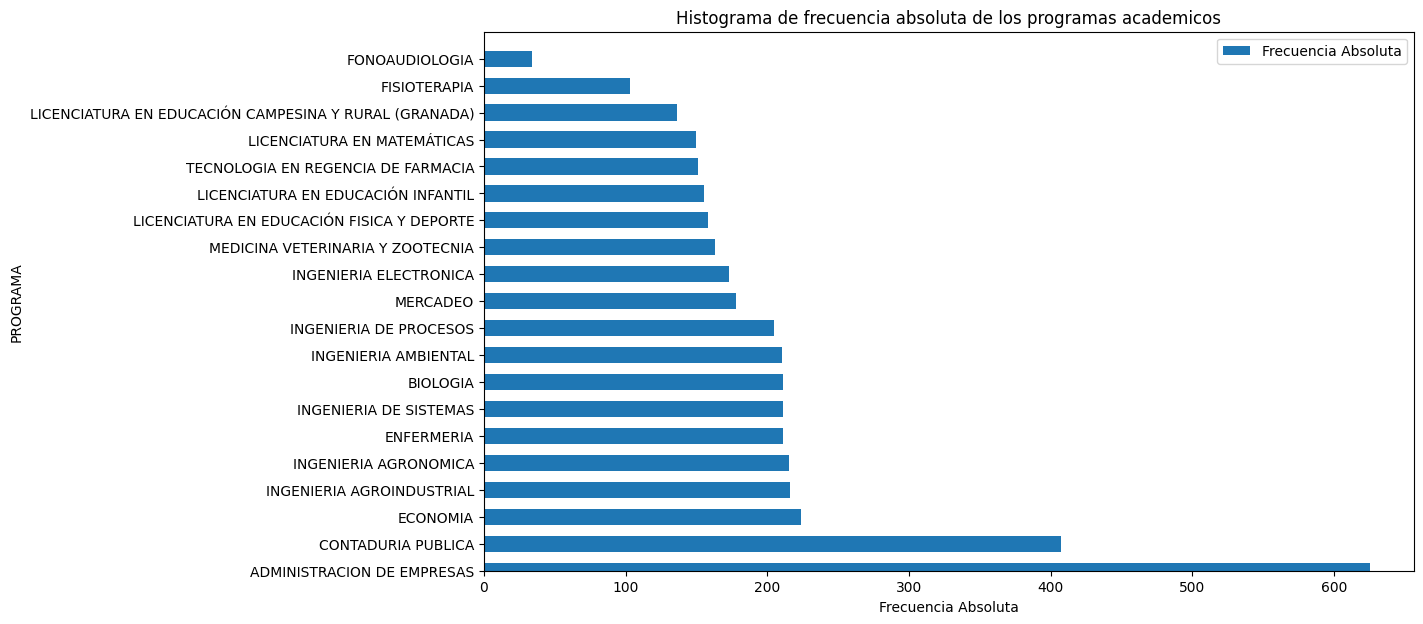

In [74]:
import matplotlib.pyplot as plt

# Obtener frecuencia absoluta de cada valor en la columna "carrera"
fabs = df['PROGRAMA'].value_counts()

# Crear un DataFrame con la frecuencia absoluta
tafe = pd.DataFrame({'PROGRAMA': fabs.index, 'Frecuencia Absoluta': fabs.values})

# Graficar histograma de barras horizontales
tafe.plot.barh(x='PROGRAMA', y='Frecuencia Absoluta', width=0.6)
plt.ylim([0,20])
plt.ylabel('PROGRAMA')
plt.xlabel('Frecuencia Absoluta')
plt.title('Histograma de frecuencia absoluta de los programas academicos')
plt.show()


In [75]:


# Obtener frecuencia absoluta de cada valor en la columna "anio"
fabs = df['ANIO'].value_counts()

# Crear un DataFrame con la frecuencia absoluta
tablafrecuencias = pd.DataFrame({'ANIO': fabs.index, 'Frecuencia Absoluta': fabs.values})

# Calcular frecuencia relativa y porcentaje
tablafrecuencias['Frecuencia Relativa'] = tablafrecuencias['Frecuencia Absoluta'] / len(df['ANIO'])
tablafrecuencias['Porcentaje'] = tablafrecuencias['Frecuencia Relativa'] * 100

# Calcular frecuencia acumulada y frecuencia relativa acumulada
tablafrecuencias['Frecuencia Absoluta Acumulada'] = tablafrecuencias['Frecuencia Absoluta'].cumsum()
tablafrecuencias['Frecuencia Relativa Acumulada'] = round(tablafrecuencias['Frecuencia Relativa'].cumsum(), 2)

# Imprimir tabla de frecuencias
#print(tablafrecuencias)
pd.DataFrame(tablafrecuencias)

#CORREGUIR!!!!!!!!!!


,ANIO,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Frecuencia Absoluta Acumulada,Frecuencia Relativa Acumulada
0,2021,2352,0.568528,56.852792,2352,0.57
1,2022,1774,0.428813,42.881315,4126,1.00
2,2023,10,0.002417,0.241721,4136,1.00
3,2,1,0.000242,0.024172,4137,1.00


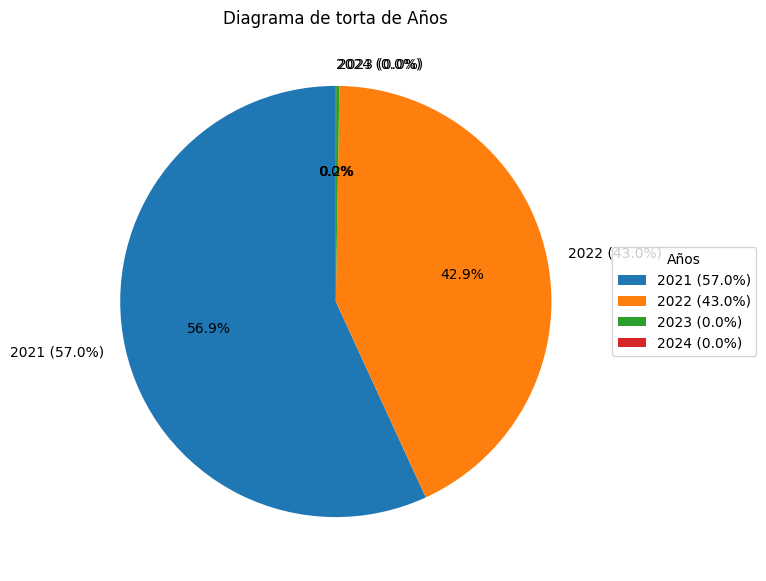

In [76]:
# Crear diagrama de torta de los años
etiquetas = ['2021', '2022', '2023', '2024']
pct = round(tablafrecuencias['Frecuencia Absoluta'] / sum(tablafrecuencias['Frecuencia Absoluta']) * 100)
etiquetas = [f'{etiquetas[i]} ({pct[i]}%)' for i in range(len(etiquetas))] # Añadimos porcentajes a etiquetas
plt.pie(tablafrecuencias['Frecuencia Absoluta'], labels = etiquetas, radius = 1, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.legend(etiquetas, title='Años', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Diagrama de torta de Años')
plt.show()

In [ ]:
# Rango, Varianza, Desviacion Estandar y coeficiente de variacion de la edad
# Rango
rang_edad = df["edad"].max() - df["edad"].min()
xbarra_edad = df["edad"].mean() #promedio
# Varianza medida de la variabilidad de los datos respecto a su media
varian_edad = df["edad"].var()
ds_edad = df["edad"].std()
# Coeficiente de variacion
CV_edad = (ds_edad / xbarra_edad) * 100

print("La mayor edad presente en los alumnos es : ", df["edad"].max())
print("La menor edad presente en los alumnos es : ", df["edad"].min())
print("El rango de Edades es: ", rang_edad)
print("la varianza de la edad es", round(varian_edad, 3))
print("La desviación estandar es", round(ds_edad, 2))
print("el coeficiente de variación es", round(CV_edad, 3), "%")

#CORREGUIR!!!!!!!!!!


In [ ]:
# Tabla de frecuencias edad
frec_abs_edad = df["edad"].value_counts()
frec_rel_edad = frec_abs_edad / len(df)
frec_por_edad = frec_rel_edad * 100
frec_abs_acum_edad = frec_abs_edad.cumsum()
frec_rel_acum_edad = frec_rel_edad.cumsum()
tablafrecuencias_edad = pd.concat([frec_abs_edad, frec_rel_edad, frec_por_edad, frec_abs_acum_edad, frec_rel_acum_edad], axis=1)
tablafrecuencias_edad.columns = ["frec_abs", "frec_rel", "frec_por", "frec_abs_acum", "frec_rel_acum"]
pd.DataFrame(tablafrecuencias_edad)

#CORREGUIR!!!!!!!!!!


In [ ]:
# Diagrama de barras de Edad
df["edad"].plot(kind="hist", bins=20, color="blue", edgecolor="black")
plt.xlabel("edad")
plt.ylabel("frecuencias")
plt.ylim([0, 1900])
plt.show()

#CORREGUIR!!!!!!!!!!
